In [4]:
import numpy as np
import matplotlib.pyplot as plt

from rcsj_sde.junction import JosephsonJunction
from rcsj_sde.simu import simulation_full 
from rcsj_sde import visu

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Set circuit parameters and run simulation

In [28]:
# circuit parameters
Ic = 0.57e-6; # ampere
R = 9; # ohm
C = 8.8e-12; # farad
T = 40e-3; # kelvin

jj = JosephsonJunction(Ic=Ic, a=1, b=0, R=R, C=C, T=T)

# DC current bias
I_min = -2*Ic; 
I_max = 2*Ic;
I_points = 5001; 
I_DC_range = np.linspace(I_min, I_max,I_points); # ramp up only

# AC current bias
I_ac = 0
f_ac = 2e9

simu = simulation_full(jj, I_DC_range, I_ac, f_ac, tau_max=4_000, tau_points=40_000)

100%|██████████| 5001/5001 [00:19<00:00, 254.27it/s]


## Plot results: V-I curve, FFT map

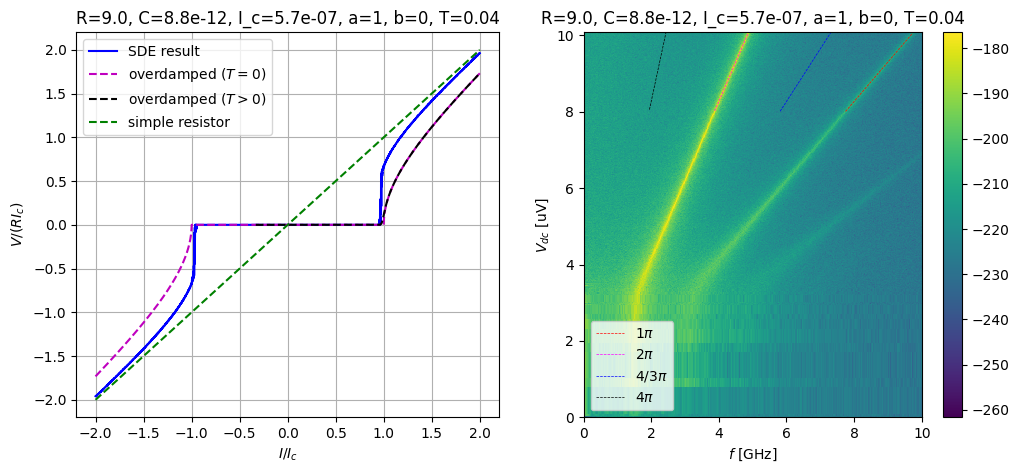

In [29]:
fig, axs = plt.subplots(1,2, figsize=(12,5))
visu.plotVI(simu, ax=axs[0])
visu.plotFFTmap(simu, axs[1])
plt.legend()

## Investigate the SDE solution for a given current bias

A solution from the finite-voltage state, $\langle d\varphi(\tau)/d\tau\rangle >0$.

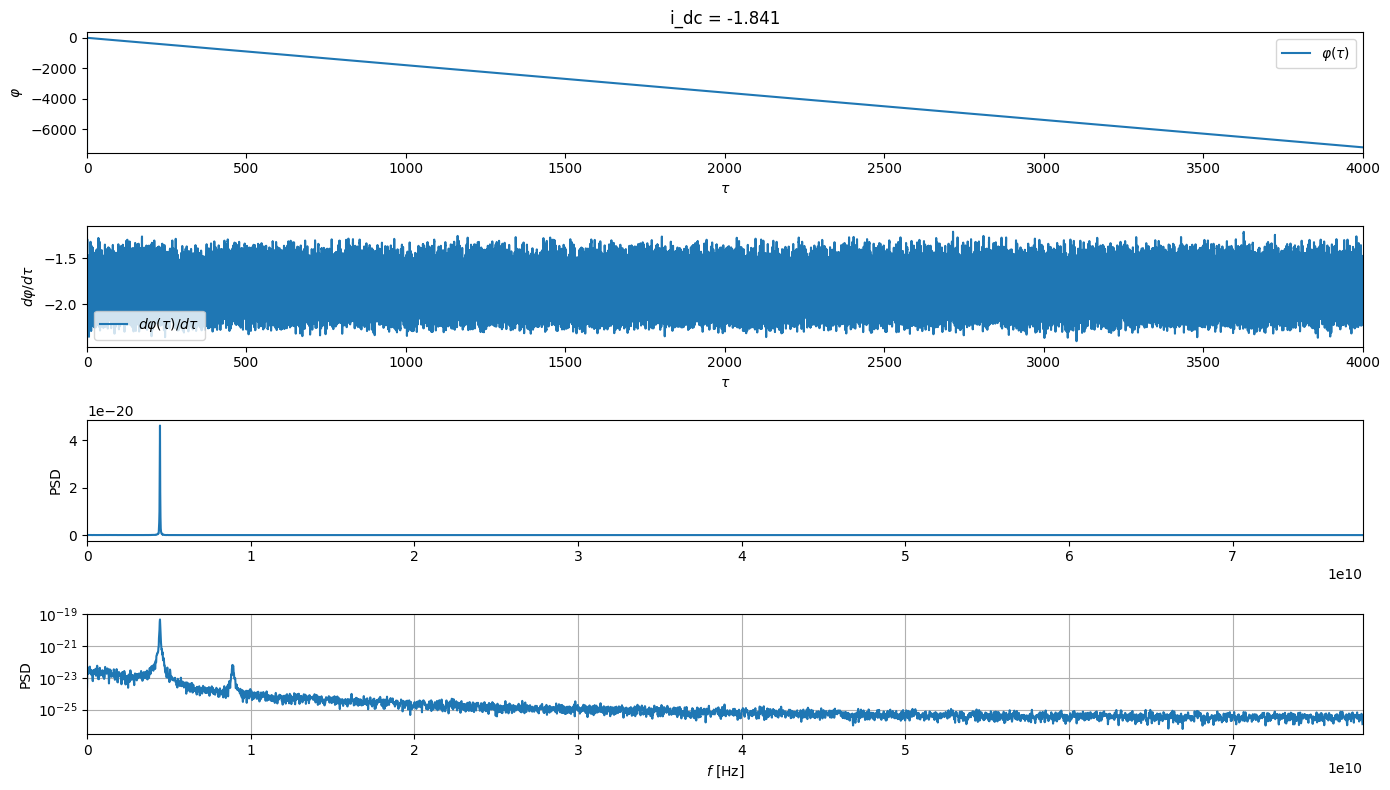

In [30]:
fig = visu.inspect_sol(simu, I_idx=199)

Let's take a closer look at the oscillation in $d\varphi(\tau)/d\tau$.

(0.0, 300.0)

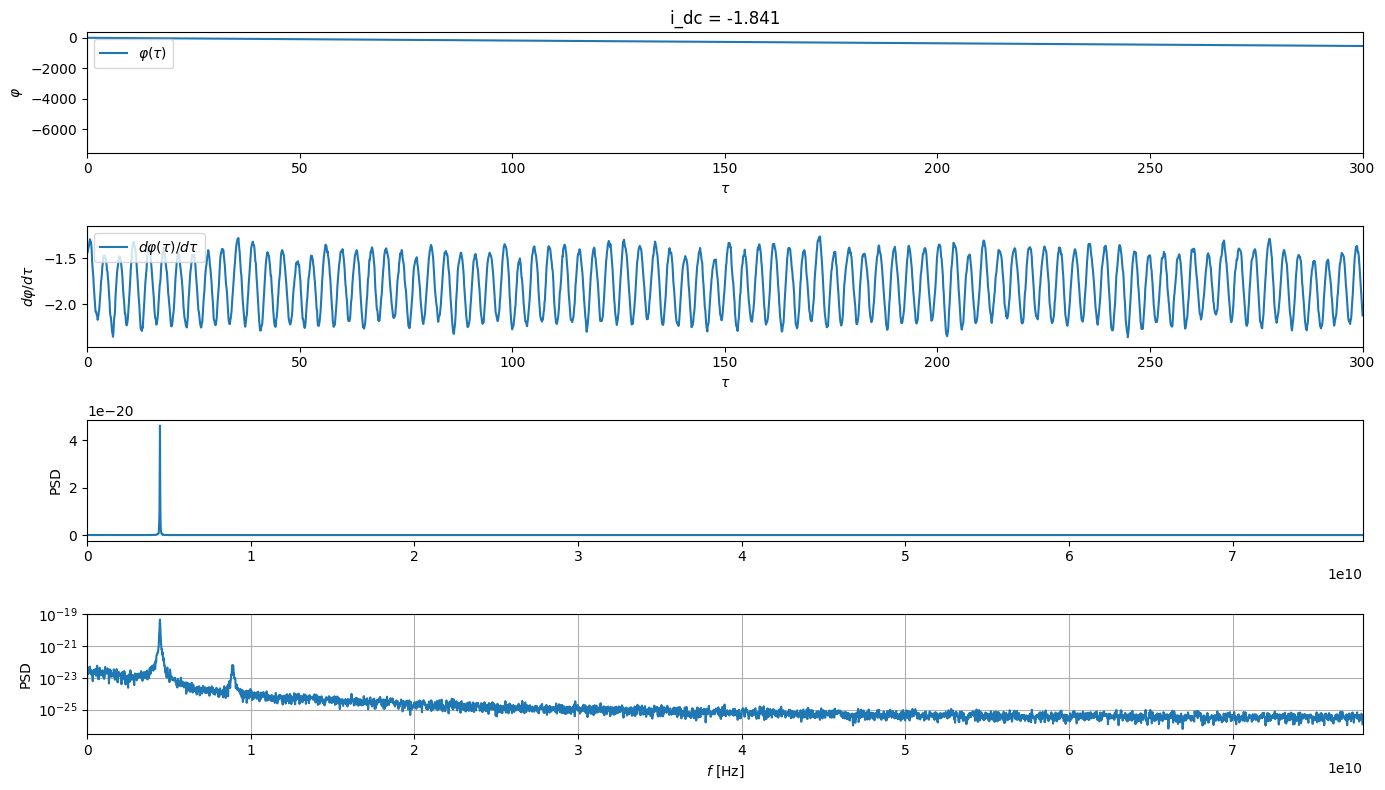

In [31]:
fig = visu.inspect_sol(simu, I_idx=199)

xmin = 0
xmax = 300

axs = fig.axes
axs[0].set_xlim([xmin, xmax])
axs[1].set_xlim([xmin, xmax])

A solution from the superconducting state, where $\langle d\varphi(\tau)/d\tau \rangle=0$.

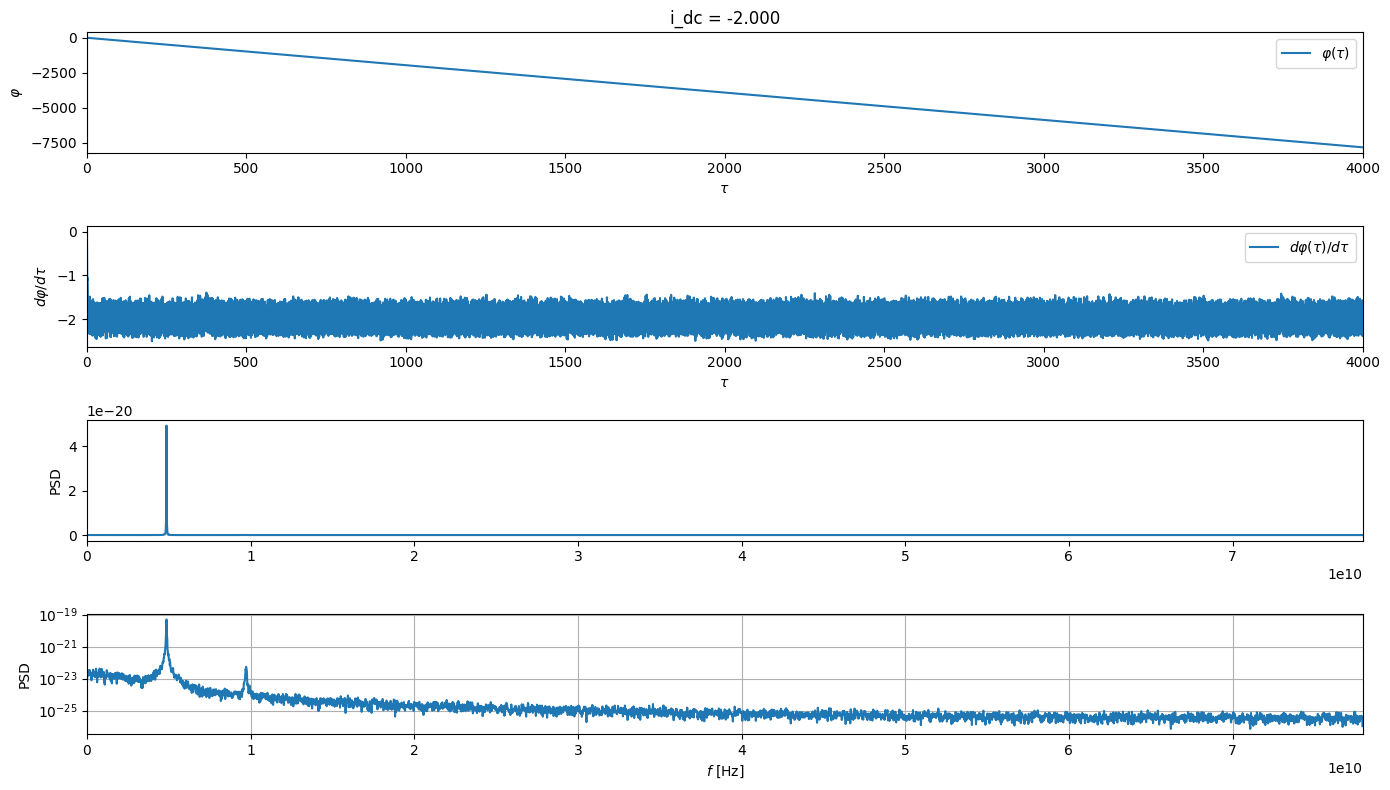

In [32]:
fig = visu.inspect_sol(simu, I_idx=0)